# Parkinsons Detection using Voice Measurement

In [1]:
import numpy as np
import pandas as pd
import os, sys

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("desktop/parkinsons.data")
print(len(data))
data.head(15)

195


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [3]:
labels=data.loc[:,'status'].to_numpy()
print(np.count_nonzero(labels==1))# number of positive labels
print(np.count_nonzero(labels==0))# number of negative labels


147
48


In [4]:
data2=data.drop(['status'],axis=1)# dropping the status column
data2.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.01351,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.01256,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.02444,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
features=data2[data2.columns[1:23]].to_numpy(dtype=object,na_value=0)
features


array([[119.992, 157.302, 74.997, ..., 0.266482, 2.301442, 0.284654],
       [122.4, 148.65, 113.819, ..., 0.33559, 2.486855, 0.368674],
       [116.682, 131.111, 111.555, ..., 0.311173, 2.342259, 0.332634],
       ...,
       [174.688, 240.005, 74.287, ..., 0.158453, 2.679772, 0.131728],
       [198.764, 396.961, 74.904, ..., 0.207454, 2.138608, 0.123306],
       [214.289, 260.277, 77.973, ..., 0.190667, 2.555477, 0.148569]],
      dtype=object)

In [6]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels


In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(x, y, train_size=0.7, random_state=42)
print(X_train.shape)
print(Y_train.shape)


(136, 22)
(136,)


# Logistic Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression(solver = 'lbfgs', max_iter = 300)


model_1.fit(X_train, Y_train)


Y_preds = model_1.predict(X_test)


Regression = print("Accuracy Score :",accuracy_score(Y_preds, Y_test)*100)


Accuracy Score : 88.13559322033898


# Decision Tree Classifier Model

In [9]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()


model_2.fit(X_train, Y_train)


Y_preds = model_2.predict(X_test)


Decision_Tree = print("Accuracy :",accuracy_score(Y_preds, Y_test)*100)


Accuracy : 86.4406779661017


# Support Vector Machine Model

In [11]:
from sklearn import svm

model_4 = svm.SVC()

model_4.fit(X_train,Y_train)

Y_pred = model_4.predict(X_test)

SVM = print("Accuracy Score :",accuracy_score(Y_test, Y_pred)*100)



Accuracy Score : 88.13559322033898


# Gaussian Naive Bayes Classifier Model

In [12]:
from sklearn.naive_bayes import GaussianNB

model_5 = GaussianNB()

model_5.fit(X_train,Y_train)

Y_pred = model_5.predict(X_test)

Naive_Bayes = print("Accuracy Score :",accuracy_score(Y_test, Y_pred)*100)

Accuracy Score : 76.27118644067797


# eXtreme Gradient Boosting Classifier Model

In [13]:
from xgboost import XGBClassifier

model_7=XGBClassifier()

model_7.fit(X_train,Y_train,verbose=True)

Y_pred=model_7.predict(X_test)

XGB = print("Accuracy Score :",accuracy_score(Y_test, Y_pred)*100)

Accuracy Score : 91.52542372881356


# Accuracy Scores of Different Models

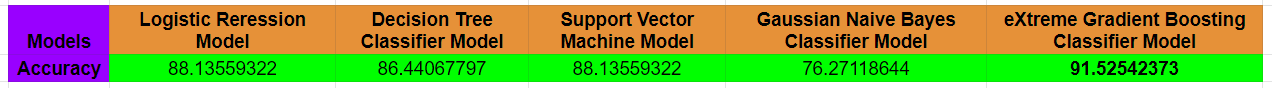